# Movie Analysis Project

## Business Understanding
### Business Problem
The company has decided to enter into the movie production industry by creating a new movie studio. However, the stakeholders lack the knowledge on which types of films perform well in the box office industry. Without understanding films that are currently performing best commercially, the studio risks investing heavily in movies that fail to attract audiences or generate revenue.

### Business Objectives
- To determine the relationship between the production budget and the profitability
- To determine the impact of ratings and vote counts on the gross revenue
- To explore trends in movie performance over the years
- To examine the performance of existing studios

### Data Understanding
We will use the data from the datasets bom.movie_gross.csv, tmdb.movies.csv and tn.movie_budgets.csv obtained from the GitHub repository: https://github.com/learn-co-curriculum/dsc-phase-2-project-v3.git

The bom.movie_gross.csv

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import sqlite3
from matplotlib import pyplot as plt
%matplotlib inline

# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore')

From the Data provided on (LINK) we decide to make one inclusive database Movie.db for easy data analysis using the code below

In [2]:
conn = sqlite3.connect('Data/movies_Data.db')

pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,bom_movie_gross
1,movie_basics
2,movie_ratings
3,tn_movie_budgets


## Loading and Previewing our Datasets 
#### We will be using the tables bom_movie_gross,  movie_basics, movie_rating, tn_movie_budgets from the movies database because they are relevant for our analysis

In [3]:
movie_gross = pd.read_sql_query("""SELECT * FROM bom_movie_gross;""",conn)
movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [4]:

movie_basics = pd.read_sql_query("""SELECT * FROM movie_basics;""",conn)
movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [5]:
movie_rating = pd.read_sql_query("""SELECT * FROM movie_ratings;""",conn)
movie_rating.head(10)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [6]:

movie_budget = pd.read_sql_query("""SELECT * FROM tn_movie_budgets;""",conn)
movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


### Checking and Handling our Data

In [7]:
def sql_table_info(conn, table_names):
    for table in table_names:
        df = pd.read_sql(f"SELECT * FROM {table};", conn)
        print(f"\n Info for table '{table}':")
        print("-" * 60)
        df.info()
        print()
table_names = ["bom_movie_gross", "movie_basics", "movie_ratings", "tn_movie_budgets"]
sql_table_info(conn, table_names)


 Info for table 'bom_movie_gross':
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


 Info for table 'movie_basics':
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146

In [8]:
def sql_table_describe(conn, table_names):
    
    for table in table_names:
        # Read the table into a DataFrame
        df = pd.read_sql(f"SELECT * FROM {table};", conn)
        
        print(f"\n Descriptive statistics for table '{table}':")
        print("-" * 60)
        display(df.describe(include='all').T)
table_names = ["bom_movie_gross", "movie_basics", "movie_ratings", "tn_movie_budgets"]
sql_table_describe(conn, table_names)


 Descriptive statistics for table 'bom_movie_gross':
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,3387,3386,Bluebeard,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,3382,257,IFC,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domestic_gross,3359.0,NaN,NaN,NaN,28745845.066984,66982498.237365,100.0,120000.0,1400000.0,27900000.0,936700000.0
foreign_gross,2037,1204,1200000,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,3387.0,NaN,NaN,NaN,2013.958075,2.478141,2010.0,2012.0,2014.0,2016.0,2018.0



 Descriptive statistics for table 'movie_basics':
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movie_id,146144,146144,tt0063540,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_title,146144,136071,Home,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,146123,137773,Broken,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_year,146144.0,NaN,NaN,NaN,2014.621798,2.733583,2010.0,2012.0,2015.0,2017.0,2115.0
runtime_minutes,114405.0,NaN,NaN,NaN,86.187247,166.36059,1.0,70.0,87.0,99.0,51420.0
genres,140736,1085,Documentary,32185,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Descriptive statistics for table 'movie_ratings':
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movie_id,73856,73856,tt10356526,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
averagerating,73856.0,NaN,NaN,NaN,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,NaN,NaN,NaN,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0



 Descriptive statistics for table 'tn_movie_budgets':
------------------------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5782.0,NaN,NaN,NaN,50.372363,28.821076,1.0,25.0,50.0,75.0,100.0
release_date,5782,2418,"Dec 31, 2014",24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
movie,5782,5698,Halloween,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_budget,5782,509,"$20,000,000",231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domestic_gross,5782,5164,$0,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
worldwide_gross,5782,5356,$0,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Inspect columns to find out which keys will be used during the merge
def table_columns(conn, table_names):
    
    table_info = {}
    for table in table_names:
        df = pd.read_sql(f"SELECT * FROM {table} LIMIT 5;", conn)
        cols = df.columns.tolist()
        table_info[table] = cols
        print(f"\n {table} columns:")
        print(cols)
    
    return table_info    
table = ["bom_movie_gross", "movie_basics", "movie_ratings", "tn_movie_budgets"]
columns = table_columns(conn, table)



 bom_movie_gross columns:
['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

 movie_basics columns:
['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']

 movie_ratings columns:
['movie_id', 'averagerating', 'numvotes']

 tn_movie_budgets columns:
['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


## Data cleaning

Converting columns to numerical form

In [10]:
def clean_currency_columns(df, columns):
    """
    Cleans commas and dollar signs from currency columns 
    and converts them to numeric.
    """
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype(str)
            df[col] = df[col].str.replace(',', '', regex=False)
            df[col] = df[col].str.replace('$', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"✅ Cleaned and converted '{col}' to numeric.")
        else:
            print(f"⚠️ Column '{col}' not found.")
    return df
movie_gross = clean_currency_columns(movie_gross, ['foreign_gross'])
movie_budget = clean_currency_columns(movie_budget, ['production_budget', 'domestic_gross', 'worldwide_gross'])


✅ Cleaned and converted 'foreign_gross' to numeric.
✅ Cleaned and converted 'production_budget' to numeric.
✅ Cleaned and converted 'domestic_gross' to numeric.
✅ Cleaned and converted 'worldwide_gross' to numeric.


In [11]:
movie_basics.info()
movie_budget.info()
movie_gross.info()
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gr

In [12]:
print(movie_budget.duplicated().sum())
print(movie_basics.duplicated().sum())
print(movie_gross.duplicated().sum())
print(movie_rating.duplicated().sum())

0
0
0
0


In [13]:
print(movie_budget.isnull().sum())
print(movie_basics.isnull().sum())
print(movie_gross.isnull().sum())
print(movie_rating.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64


In [14]:

# Handle missing value in original_title column in movie_basics by dropping the row
movie_basics.dropna(subset=['original_title', 'runtime_minutes'], inplace=True)

# Impute missing values
# For categorical/object columns, impute with a placeholder 'Unknown'
movie_gross['studio'].fillna('Unknown', inplace=True)
movie_basics['genres'].fillna('Unknown', inplace=True)

# For numerical columns, impute with the median
movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].median(), inplace=True)
movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median(), inplace=True)

# Verify that missing values have been handled
print("Missing values after handling in gross_copy:")
print(movie_gross.isnull().sum())
print("\nMissing values after handling in basics_copy:")
print(movie_basics.isnull().sum())

Missing values after handling in gross_copy:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Missing values after handling in basics_copy:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


## Feature Engineering

We merged movie_basics and movie_ratings using the primary key movie_id

In [15]:
#Merge datasets
query = """
SELECT * 
FROM 
    movie_basics AS mb
JOIN 
    movie_ratings AS mr
USING (movie_id)    
;
"""
merged_movie_ratings = pd.read_sql_query(query, conn)
merged_movie_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [16]:
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']

movie_budget['profit'] = movie_budget['total_gross'] - movie_budget['production_budget']

movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [17]:
# Let us create a new column in the merged dataset called total_gross
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

display(movie_gross.head())

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [18]:
merged_movie_ratings.duplicated().sum()

0

## EDA(Exploratory Data Analysis)

### Univariate Analysis
This is the analysis of one variable at a time, where we get to understand the distribution and spread of that variable.

### Distribution of averagerating in the movie_rating dataset.

<Axes: xlabel='averagerating', ylabel='Count'>

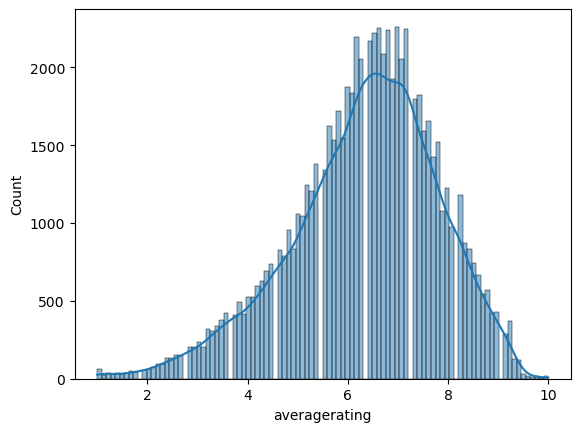

In [ ]:
sns.histplot(movie_rating['averagerating'], kde=True)

# kde=True tells the function to include a Kernel Density Estimate (KDE) curve on the plot, which provides a smoothed representation of the distribution.

from this histogram, we can see that the ratings range from 0-10.
The distribution appears to be roughly bell-shaped, but skewed to the left.
Meaning there are more movies with ratings clustered towards the higher end of the scale than the lower end.
The average ratings in this dataset are generally concentrated on the higher side,
with a peak around 6-7, and fewer movies receiving very low or very high ratings.

### Distribution of movies across the years

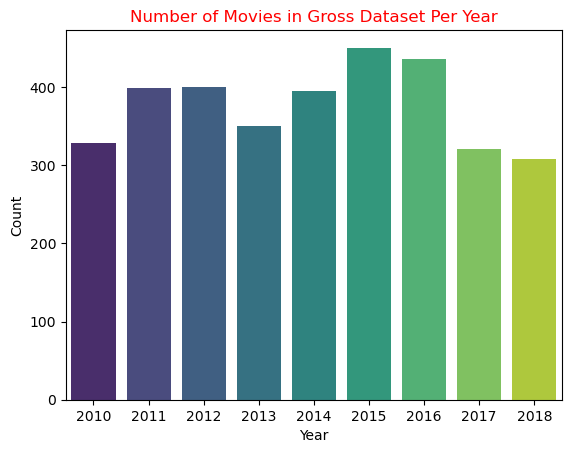

In [25]:
# Plotting a bar plot of the year column in the 'year' column in the gross dataset

# we use seaborn to create a bar chart
sns.countplot(x='year', data=movie_gross, palette='viridis')

# Labelling our x axis
plt.xlabel("Year")

# Labelling our y axis
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Number of Movies in Gross Dataset Per Year", color='red')

# Displaying our chart
plt.show()


From the Bar raph above, the number of movies in this dataset generally increased from 2010 to 2015.
The year 2015 appears to have the highest number of movies in this dataset.
After 2015, there seems to be a slight decrease in the number of movies in this dataset towards 2018'''

### Distribution of prevalent genres

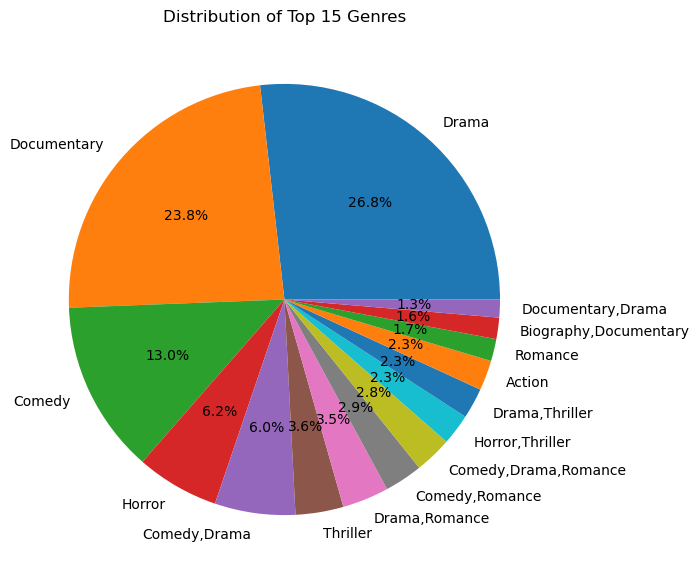

In [27]:
genre_counts = merged_movie_ratings["genres"].value_counts()
top_n_genres = 15
genre_counts.head(top_n_genres).plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title(f'Distribution of Top {top_n_genres} Genres')
plt.ylabel('') # Remove the default 'genres' label on the y-axis
plt.show()

Based on this piechart, we can see that drama, comedy and action are the most prevalent genres in this dataset.
however, to make these findings actionable for the company,
we'd need to investigate if the prevalence of a genre correlates with its success.
To do this we need to perform bivariate and multivariate analysis

## Bivariate Analysis
This is the analysis of two variables that focus on identifying the relationship or association between them.


### Analyzing the Relationship between Production Budget and Profitability

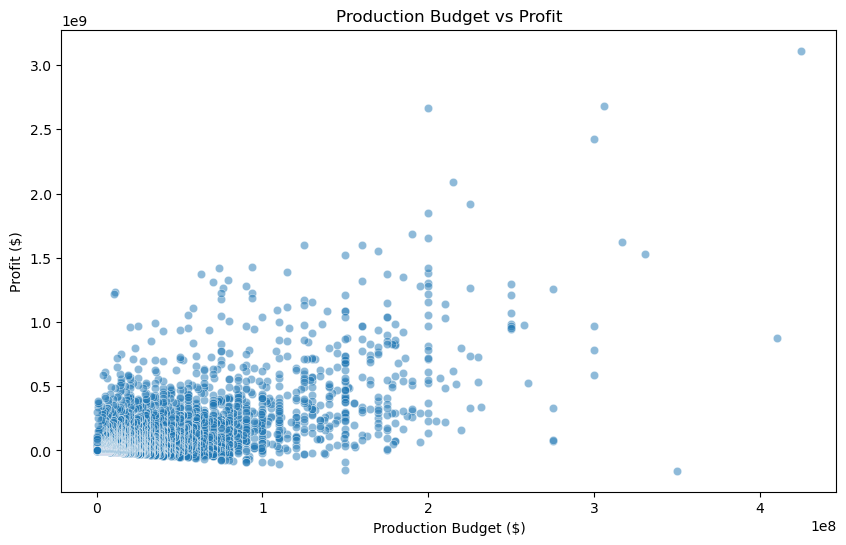

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data= movie_budget,
    x="production_budget", 
    y="profit",
    alpha=0.5  # makes overlapping points visible
)

plt.title("Production Budget vs Profit")
plt.xlabel("Production Budget ($)")
plt.ylabel("Profit ($)")
plt.show()

Production budget and Profit have a positive correlation.From the scatter plot, most data points are highly clustered on the left bottom side showing low profit and low production budget. Also we can spot outliers on the higher top right side, with extremely high profits and production budget. On the bottom right, the outliers have low profit, with high production